# Project: Wrangling and Analyze Data

In this project, I'm gathering data from three different sources related to the twitter account WeRateDogs. They publish photos of dogs (mostly) and rate them well over 10 over 10 most of the time. The tweets published by this account have an humoristic, light tone. Besides the rating and a picture of the dog, the tweets include some text about the story behind the picture and sometimes the name of the dog. After gathering the datasets, I will assess them to see any quality or tidiness issue they could contain. While assessing, I will note in a list any of these issues in order to start solving them one by one once the assessment is finished.

For each issue, I will define it, code to solve it and then test that the code worked and the result is the one I wanted. If necessary, I will iterate through the different phases of the cleanning process.

## Data Gathering

In this part of the project, I gathered three pieces of data needed for the project: 
 - a csv file containing mainly the tweets id, the expanded url, rating, text, names of the dogs.
 - a tsv file containing the images of the tweets, tweets id, three predictions about the content of the pictures, the confidence interval related to each prediction and whether or not each prediction is of a dog.
 - a data file extracted from tweeter with their API tweepy. It contains mainly the like and retweets counts as well as the tweet id.

 The methods required to gather each piece of data were different.
 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

__Importing the necessary libraries for the project__

In [1]:

import pandas as pd
import numpy as np
import requests
import tweepy
import json 
import matplotlib.pyplot as plt

__Loading the WeRateDogs csv file to a data frame__

In [2]:
df_1=pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

__Downloading the image_predictions.tsv file with "requests"__

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)

df_2=pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

__I had to install not only an upgrade of tweepy in the Workspace, but also python, jsonchema and ipywidgets.__

In [4]:
'''!pip install ipywidgets --upgrade
#!pip install jsonschema --upgrade
#!pip install notebook --upgrade
!pip install --upgrade tweepy==4.6.0'''

'!pip install ipywidgets --upgrade\n#!pip install jsonschema --upgrade\n#!pip install notebook --upgrade\n!pip install --upgrade tweepy==4.6.0'

__I extracted the tweets using tweepy and Client method as I was allowed only 
Essential developer access__

In [5]:
"""import tweepy
from tweepy import OAuthHandler
import time
import os

client = tweepy.Client(consumer_key = '...', 
                                consumer_secret = '...',
                               access_token = '...')

                                


bearer_token='...'

client=tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

tweet_ids=df_1["tweet_id"].tolist()

info=['public_metrics']

tweet_info=[]

start_time=time.time()

for tweet_id in tweet_ids:
    try:
            public_metrics={}
            
            public_metrics['tweet_id']=tweet_id
            
            temp_data=client.get_tweet(id=tweet_id, tweet_fields=info)
            
            if temp_data.data:
                if temp_data.data.get('public_metrics'):
                    for key, value in temp_data.data['public_metrics'].items():
                        public_metrics[key]=value
            
            tweet_info.append(public_metrics)
                 

    except Exception as e:
            print('No tweet found for{}'.format(str(tweet_id), str(e)))

end_time=time.time()
print('whole process finished in {} seconds'.format(end_time-start_time))"""


'import tweepy\nfrom tweepy import OAuthHandler\nimport time\nimport os\n\nclient = tweepy.Client(consumer_key = \'...\', \n                                consumer_secret = \'...\',\n                               access_token = \'...\')\n\n                                \n\n\nbearer_token=\'...\'\n\nclient=tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)\n\ntweet_ids=df_1["tweet_id"].tolist()\n\ninfo=[\'public_metrics\']\n\ntweet_info=[]\n\nstart_time=time.time()\n\nfor tweet_id in tweet_ids:\n    try:\n            public_metrics={}\n            \n            public_metrics[\'tweet_id\']=tweet_id\n            \n            temp_data=client.get_tweet(id=tweet_id, tweet_fields=info)\n            \n            if temp_data.data:\n                if temp_data.data.get(\'public_metrics\'):\n                    for key, value in temp_data.data[\'public_metrics\'].items():\n                        public_metrics[key]=value\n            \n            tweet_info.append(publi

__I converted 'tweet_info' list to a dataframe (df_3)__

In [6]:
'''df_3=pd.DataFrame(tweet_info)
df_3.head()'''

'df_3=pd.DataFrame(tweet_info)\ndf_3.head()'

__I saved the dataframe to a csv file so I didn't have to repeat the extraction__

In [7]:
"df_3.to_csv('tweet_json.csv', index=False)"

"df_3.to_csv('tweet_json.csv', index=False)"

__I read the csv file into the dataframe in order to work with it__

In [8]:
df_3=pd.read_csv('tweet_json.csv')

## Assessing Data


In this part of the project I inspected the datasets both visually and programatically to detect and note down any quality and tidiness issue that should be solved before proceeding to the analysis and visualization part of the project

__I started by visually checking each dataframe__

In [9]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


__Checked the numerators of the rating in the first dataframe.__

In [10]:
df_1.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

__Then I checked the denominators.__

In [11]:
df_1.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

__Most of the denominators are of value 10__

In [12]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

__I found denominators below 10 suspicious so I check them out__
__For the one below the extraction of the rating from the tweet text isn't correct as for many others. I found an issue__

In [13]:
df_1[df_1.rating_denominator==2]
 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


__As the tweets should be about original content and not retweets or answers to other tweets, I checked the number of retweeted tweets__

In [14]:
sum(df_1.retweeted_status_id.value_counts())

181

__There are 181 retweets that shouldn't be in the dataframe. That's another quality issue_
__I then checked the null values, the datatypes, and the name of the columns, specially those that would point out retweets or answers to tweets__

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

__I checked visually the dataframe concerning the images from the tweets and the neural recognition__

In [16]:
df_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1556,793210959003287553,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1,doormat,0.874431,False,French_bulldog,0.018759,True,Boston_bull,0.015134,True
377,673213039743795200,https://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg,1,schipperke,0.888082,True,groenendael,0.047727,True,kelpie,0.041398,True
2009,878281511006478336,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1,basset,0.320420,True,collie,0.215975,True,Appenzeller,0.128507,True
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True
1250,747885874273214464,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,kuvasz,0.408450,True,Samoyed,0.141330,True,pug,0.083018,True
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
603,679844490799091713,https://pbs.twimg.com/media/CW9K9VeVAAE0j-x.jpg,1,Airedale,0.903832,True,Border_terrier,0.034713,True,toy_poodle,0.021378,True
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True
1997,875021211251597312,https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg,2,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True
47,666817836334096384,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,1,miniature_schnauzer,0.496953,True,standard_schnauzer,0.285276,True,giant_schnauzer,0.073764,True


__From checking out a few tweets, I realized that when all three predictions of dogs in the images are equal to False, the images are not of dogs but of something else. That's another quality issue to be noted down and solved in the next part of the project.
I check out how many entries there are with wrong images - not dogs.__

In [17]:
len(df_2[(df_2['p1_dog']==False) & (df_2['p2_dog']==False) & (df_2['p3_dog']==False) ])

324

__Checking the datatypes of the second dataframe and null values__

In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


__There seems to be no null value. Is there any duplicated pic?__

In [19]:
sum(df_2.jpg_url.duplicated())

66

__There are 66. That's a new quality issue__

__I checked the third file, the one with the tweets extracted using tweepy__

In [20]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
like_count       2327 non-null float64
quote_count      2327 non-null float64
reply_count      2327 non-null float64
retweet_count    2327 non-null float64
tweet_id         2356 non-null int64
dtypes: float64(4), int64(1)
memory usage: 92.1 KB


__There are some null values in this file(see below). As for above, these are probably the rows without a tweet_id (another quality issue)__

In [21]:
sum(df_3.isnull().any(axis=1))

29

__Tweet_id column name is present in the three dataframes.__

In [22]:
all_columns=pd.Series(list(df_1)+list(df_2)+list(df_3))
all_columns[all_columns.duplicated()]


17    tweet_id
33    tweet_id
dtype: object

__I checked the name of dogs in lower case to see if I can find any anomaly and I did.__

In [23]:
df_name=df_1[df_1['name'].str[0].str.islower()]
df_name['name'].value_counts()

               

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
getting          2
not              2
mad              2
unacceptable     1
light            1
officially       1
this             1
by               1
infuriating      1
his              1
all              1
incredibly       1
old              1
my               1
such             1
space            1
life             1
Name: name, dtype: int64

### Quality issues

1. Tweets that are retweets or answers to other tweets shouldn't be in df_1 (tweeter_enhanced file), only original tweets about rating dogs(78 replies and 181 rt)

2. Erroneous data type in df_1 and df_2: 'timestamp' should be time data type, 'dog_stage' category data type, 'ratings' float data type, 'img_num' category type, p1_dog boolean, p2_dog boolean and p3_dog boolean, too.

3. Some 'name' field values (109) are incorrect (df_1) or missing (value 'None' for 745 rows.

4. String format of 'Source' is not standard (df_1). Nevertheless, it's not an interesting field with only four different unique values. 

5. In df_2(image-prediction file) when none of the three predictions correspond to a dog, the images are of something else.

6. In df_2 there are 66 duplicated images.

7. Many of the values of the rating('rating_numerator' and 'rating_denominator') do not correspond to the rating numbers in the tweets' text.  

8. Erroneous data type in df_3(tweets extracted with Tweepy) fields: 'like_count', 'quote_count', 'reply_count' and 'retweet_count' should be int and not float, whereas 'tweet_id' should be categorical data type.

9. There are 29 'tweet_id' values without any other values (null values for the rest of the row) in df_3.


### Tidiness issues


1. Dog stages should be in a column instead of four (df_1) 

2. Tweet_id is the common field to the three datasets, i.e. it's duplicated in two of the datasets. It would be tidier and more convenient to merge the three datasets into a master dataframe and dropping unnecessary columns.


## Cleaning Data
In this section, I'll clean **all** of the issues I documented while assessing.

First, I did a copy of the original dataframes before cleaning. Then I merged the individual pieces into a master pandas dataframe and solved the described issues.

__Making copies of original pieces of data__

In [24]:
df1_clean=df_1.copy()
df2_clean=df_2.copy()
df3_clean=df_3.copy()

### Tidiness Issue #1:

#### Define

Dog stages should be in a column instead of four (df_1).
I'm going to combine the three columns in one(concatenation). But first I will remove all the strings == 'None'

#### Code

__I replace 'None' string by an empty one to make the concatenation easier. 
Then I drop the columns that are not needed anymore__

In [25]:
df1_clean.doggo=df1_clean.doggo.replace('None', '')
df1_clean.floofer=df1_clean.floofer.replace('None', '')
df1_clean.pupper=df1_clean.pupper.replace('None', '')
df1_clean.puppo=df1_clean.puppo.replace('None', '')
df1_clean['dog_stage']=df1_clean.doggo+df1_clean.floofer+df1_clean.pupper+df1_clean.puppo
df1_clean= df1_clean.drop(['doggo', 'floofer','pupper','puppo'], axis = 1)


#### Test

__Checking the result in the columns heading__

In [26]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


__I see that there are 14 entries with two dog stages__

In [27]:
df1_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

__I separate the composed dog stages to make it tidier__

In [28]:
df1_clean.loc[df1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df1_clean.loc[df1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df1_clean.loc[df1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


### Tidiness Issue #2:

#### Define

Tweet_id is the common field to the three datasets, i.e. it's duplicated in two of the datasets. It would be tidier and more convenient to merge the three datasets into a master dataframe and dropping unnecessary columns.

#### Code

__Merged on the right because  I want each tweet to have a picture attached to it, i.e. I don't want to keep tweets without images as they are a big part of the tweets published by WeRateDogs account__

In [29]:
m_df=pd.merge(df1_clean,df2_clean, on=['tweet_id'], how='right')

__Then continued merging with the third dataframe. On the left this time because images are already in the dataframe on the left and df3_clean has a few null values__

In [30]:
master_df= pd.merge(m_df, df3_clean, on=['tweet_id'], how='left')


#### Test

In [31]:
#The merged df
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 29 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
dog_stage                     2075 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 n

__Checking first rows of the new dataframe visually__

In [32]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,33856.0,219.0,141.0,7022.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,29360.0,274.0,170.0,5304.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,22077.0,145.0,109.0,3487.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,36971.0,286.0,142.0,7234.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35348.0,296.0,193.0,7773.0


### Quality Issue #1:

#### Define

Tweets that are retweets or answers to other tweets shouldn't be in the dataframe. I'm going to filter out all the retweets (181 rows) and replies (78) and then drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', as they will only contain null values.  

__A glance to the fields/columns that I'm going to drop__

In [33]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 29 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
dog_stage                     2075 non-null object
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 n

#### Code

__Filtering out the tweets that are replies or retweets__

In [34]:
master_df=master_df[(~master_df['in_reply_to_status_id'].notnull()) & (~master_df['retweeted_status_id'].notnull())]

#### Test

__Now the concerned columns only have null values. I can drop them__

In [35]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 29 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_stage                     1971 non-null object
jpg_url                       1971 non-null object
img_num                       1971 non-null int64
p1                            1971 non-null object
p1_conf                       1971 non-nu

#### Code again

__Dropping the columns__

In [36]:
master_df= master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

#### Test again

__Checking number and name of remaining columns__

In [37]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
like_count            1963 non-null floa

### Quality Issue #2:

#### Define
Erroneous data type in df_1: 'timestamp' should be time data type, 'dog_stage' category data type, and 'img_num' category data type. I'm going to modify the data type of the concerned fields.

#### Code

__Modifying data type of various columns in df1_clean, now merged into master_df__

In [38]:
master_df['timestamp']=pd.to_datetime(master_df['timestamp'])
master_df = master_df.astype({'dog_stage': 'category', 'img_num':'category','p1_dog':'bool','p2_dog':'bool', 'p3_dog':'bool'})

#### Test

__I could not correct data type of a few columns from the former df_3 
due to null values. I'll note it to do it down the road if it doesn't get solved due to other cleaning acts__

In [39]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null category
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
like_count            1963 

### Quality Issue #3:

#### Define
Some 'name' field values (109) are incorrect (df_1). Not all tweets contain the name of a dog, but I'm going to try and extract the names from those that do.
First, I will remove the wrong strings from name field(all strings starting by lowercase)

__As we can see below none of the strings starting by lower case are dog names:__

In [40]:
df_name=df_1[(df_1['name'].str[0].str.islower())]
df_name
df_name.name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
getting          2
not              2
mad              2
unacceptable     1
light            1
officially       1
this             1
by               1
infuriating      1
his              1
all              1
incredibly       1
old              1
my               1
such             1
space            1
life             1
Name: name, dtype: int64

__There are also many tweets that either do not display the name or the extraction wasn't successful and the column contains "None" as value. Let's see how many__

In [41]:
df_name_none=df_1[(df_1['name']=='None')]
len(df_name_none[0:])

745

#### Code

__I created 4 different rules with regex to extract the names of the tweets again__

In [42]:
master_df[['name1','name2','name3','name4']]=master_df.text.str.extract(r'names?\s?d?\s?i?s?a?r?e?\s?([A-Z]\w*)|\(IG: ([a-z]*)|^[A-Z]\w* i?s?\s?([A-Z][a-z]+)|[A-Z][a-z]{2-3} [a-z]* t?o?\s?([A-Z]\w+)',expand=True)
master_df= master_df.drop('name', axis = 1)


__I had to create 4 new name columns - one for each regex -. I concatenate them to have only a column__

In [43]:
cols = ['name1', 'name2', 'name3', 'name4']
master_df["name"] = master_df[cols].apply(lambda x: ','.join(x.dropna()), axis=1)


#### Test

__I check if the new 'name' column contains the information of the concatenated columns__

In [44]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,...,p3_dog,like_count,quote_count,reply_count,retweet_count,name1,name2,name3,name4,name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,33856.0,219.0,141.0,7022.0,NaN,NaN,Phineas,NaN,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,29360.0,274.0,170.0,5304.0,NaN,NaN,Tilly,NaN,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,22077.0,145.0,109.0,3487.0,NaN,NaN,Archie,NaN,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,36971.0,286.0,142.0,7234.0,NaN,NaN,Darla,NaN,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,35348.0,296.0,193.0,7773.0,NaN,NaN,Franklin,NaN,Franklin


__I dropped the name columns that I don't need anymore__

In [45]:
master_df= master_df.drop(['name1','name2','name3','name4'], axis = 1)

__There are still missing names but many less than before__

In [46]:
master_df.name.value_counts()


             672
Charlie       10
Tucker         9
Lucy           9
Cooper         9
Penny          8
Oliver         8
Winston        7
Lola           7
Daisy          7
Stanley        6
Toby           6
Bella          6
Sadie          6
Koda           6
Jax            6
Bo             6
Scout          5
Chester        5
Rusty          5
Zoey           5
Louis          5
Buddy          5
Dave           5
Oscar          5
Milo           5
Bailey         5
Cassie         4
Bear           4
Duke           4
            ... 
Caryl          1
Eevee          1
Leonidas       1
Butters        1
Mary           1
Josep          1
Apollo         1
Eriq           1
Rilo           1
Mingus         1
Clarkus        1
Tripp          1
Dot            1
Julius         1
Scott          1
Klein          1
Cupit          1
Skye           1
Jeremy         1
Benny          1
Jay            1
Monkey         1
Thea           1
Mason          1
Romeo          1
Tess           1
Flurpson       1
Alejandro     

__Changed empty cells in 'name' column by Nan to make the dataframe tidier and also to be able to change the datatype__

In [47]:
master_df['name'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)

__Converted 'name' column to string datatype__

In [48]:
master_df = master_df.astype({'name': 'str'})
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
dog_stage             1971 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null category
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
like_count            1963 non-null float64
quote_count           1963

### Quality Issue #4:

#### Define
 String format of 'Source' is not standard (df_1). Nevertheless, after checking the values in the field, I decided to drop the column. I don't see the use for it. 

__I checked the full contain of the cells in 'source' column and evaluate if the unique values contain any interesting information.__

In [49]:
pd.options.display.max_colwidth=100
master_df.source.sample(5)
master_df.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

__I don't see the point to keep the column as it only contains the three sources (desk tweet, iphone, tweetdeck) used to publish the tweets__

#### Code

__Dropping the column__

In [50]:
master_df= master_df.drop(['source'], axis = 1)

#### Test

__Checking that the column doesn't exist anymore in our dataframe__

In [51]:
master_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count,name
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,0.085851,False,banana,0.076110,False,33856.0,219.0,141.0,7022.0,Phineas
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,0.090647,True,papillon,0.068957,True,29360.0,274.0,170.0,5304.0,Tilly
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,0.078253,True,kelpie,0.031379,True,22077.0,145.0,109.0,3487.0,Archie
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,0.168086,True,spatula,0.040836,False,36971.0,286.0,142.0,7234.0,Darla
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,0.225770,True,German_short-haired_pointer,0.175219,True,35348.0,296.0,193.0,7773.0,Franklin


### Quality Issue #5:

#### Define
When none of the three predictions of images correspond to a dog, the images are of something else. I'm going to drop the rows with no dogs in them


#### Code

__Dropped the rows with images of something else than dogs__

In [52]:
master_df=master_df.drop(master_df[(master_df['p1_dog']==False) & (master_df['p2_dog']==False) & (master_df['p3_dog']==False) ].index)


#### Test

__Checking that it worked__

In [53]:
len(master_df[(master_df['p1_dog']==False) & (master_df['p2_dog']==False) & (master_df['p3_dog']==False) ])

0

### Quality Issue #6:

#### Define
There were 66 duplicated images. Nevertheless and after previous cleaning steps there are no more duplicated images.

#### Code

__Checking the duplicated images__

In [54]:
master_df[master_df.duplicated(subset=['jpg_url'], keep=False)].sort_values(by=['jpg_url'])

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count,name


### Quality Issue #7:

#### Define
The rating_numerator and rating_denominator contain many wrong values. I'm going to extract the ratings again, compare them with the existing columns and drop the old columns once I'm done.

#### Code

__I used regex as for the names__

In [55]:
master_df[['ratings_numerator1', 'ratings_denominator1']]=master_df.text.str.extract('([0-9]+?\.?[0-9]?[0-9]?)\/(\d+\d+)',expand=True).astype('float')

master_df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,jpg_url,img_num,p1,...,p3,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count,name,ratings_numerator1,ratings_denominator1
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,papillon,0.068957,True,29360.0,274.0,170.0,5304.0,Tilly,13.0,10.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,kelpie,0.031379,True,22077.0,145.0,109.0,3487.0,Archie,12.0,10.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,spatula,0.040836,False,36971.0,286.0,142.0,7234.0,Darla,13.0,10.0
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,German_short-haired_pointer,0.175219,True,35348.0,296.0,193.0,7773.0,Franklin,12.0,10.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breath...,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,...,Indian_elephant,0.076902,False,17828.0,43.0,58.0,2603.0,tucker,13.0,10.0


#### Test

__I changed the datatype of the existing data__

In [56]:
master_df = master_df.astype({'rating_numerator': 'float', 'rating_denominator': 'float'})

__I compare the ratings that do not match the old ones (numerator first).__

In [57]:
bad_matches=master_df[master_df['ratings_numerator1']!=master_df['rating_numerator']]
bad_matches[['tweet_id','rating_numerator','ratings_numerator1', 'rating_denominator','ratings_denominator1']]

,tweet_id,rating_numerator,ratings_numerator1,rating_denominator,ratings_denominator1
41,883482846933004288,5.0,13.50,10.0,10.0
416,810984652412424192,24.0,NaN,7.0,NaN
559,786709082849828864,75.0,9.75,10.0,10.0
615,778027034220126208,27.0,11.27,10.0,10.0
1453,680494726643068929,26.0,11.26,10.0,10.0
2054,666287406224695296,1.0,9.00,2.0,10.0


__I compare the ratings that do not match the old ones (denominators last).__

In [58]:
bad_matches_d=master_df[master_df['ratings_denominator1']!=master_df['rating_denominator']]
bad_matches_d[['tweet_id','rating_numerator','ratings_numerator1', 'rating_denominator','ratings_denominator1']]

,tweet_id,rating_numerator,ratings_numerator1,rating_denominator,ratings_denominator1
416,810984652412424192,24.0,NaN,7.0,NaN
2054,666287406224695296,1.0,9.0,2.0,10.0


Conclusion: The six rows that do not match the previous extraction are correct now and weren't before.

__Most of the denominators of the ratings are equal to 10__

In [59]:
master_df.ratings_denominator1.value_counts()

10.0     1651
50.0        3
80.0        2
11.0        2
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
70.0        1
Name: ratings_denominator1, dtype: int64

__I checked the text of the tweets with a denominator other than 10. I found 4 errors that I'm going to correct in the part b of this quality issue__

In [60]:
master_df.head()
master_df[master_df.ratings_denominator1 != 10.][['text','tweet_id']]

,text,tweet_id
346,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481
416,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clickin...,810984652412424192
736,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024
878,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our se...",740373189193256964
969,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656
1003,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 ht...,716439118184652801
1024,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,713900603437621249
1049,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.c...,710658690886586372
1067,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 4...",709198395643068416
1133,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,704054845121142784


____Now I will drop the old rating columns____

In [61]:
master_df= master_df.drop(['rating_numerator','rating_denominator'], axis = 1)

__I'm going to create an only column with the ratings to make it easier to use
information in the 'Analyzing and Visualizing' phase__

In [62]:
master_df['rating']=master_df['ratings_numerator1']/master_df['ratings_denominator1']
master_df.head(3)

,tweet_id,timestamp,text,expanded_urls,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,...,p3_conf,p3_dog,like_count,quote_count,reply_count,retweet_count,name,ratings_numerator1,ratings_denominator1,rating
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,...,0.068957,True,29360.0,274.0,170.0,5304.0,Tilly,13.0,10.0,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,0.031379,True,22077.0,145.0,109.0,3487.0,Archie,12.0,10.0,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,https://twitter.com/dog_rates/status/891689557279858688/photo/1,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,...,0.040836,False,36971.0,286.0,142.0,7234.0,Darla,13.0,10.0,1.3


## Quality Issue 7.b

#### Define
There are still some incorrect ratings:
- Rating 4/20 in row corresponding to tweet_id 722974582966214656 is not correct. The rating for that tweet is 13/10.
- Tweet_id: 716439118184652801.It should be 11/10 instead of 50/50
- Tweet_id: 740373189193256964. It should be 14/10 instead of 9/11
- Tweet_id: 682962037429899265. It should be 10/10 instead of 7/11


#### Code

__Replacing wrong ratings__

In [63]:
master_df.loc[master_df.tweet_id == 722974582966214656, 'rating'] = 13/10
master_df.loc[master_df.tweet_id == 716439118184652801, 'rating'] = 11/10
master_df.loc[master_df.tweet_id == 740373189193256964, 'rating'] = 14/10
master_df.loc[master_df.tweet_id == 682962037429899265, 'rating'] = 10/10


#### Test

__Checking the modified tweet ratings. They are correct now__

In [64]:
master_df[master_df.tweet_id == 722974582966214656]['rating'] 
master_df[master_df.tweet_id == 716439118184652801]['rating'] 
master_df[master_df.tweet_id == 740373189193256964]['rating'] 
master_df[master_df.tweet_id == 682962037429899265]['rating']  


1407    1.0
Name: rating, dtype: float64

__Dropping the ratings_numerator1 and ratings_denominator1 columns
I don't need them anymore__

In [65]:
master_df= master_df.drop(['ratings_numerator1','ratings_denominator1'], axis = 1)

In [66]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2074
Data columns (total 22 columns):
tweet_id         1666 non-null int64
timestamp        1666 non-null datetime64[ns]
text             1666 non-null object
expanded_urls    1666 non-null object
dog_stage        1666 non-null category
jpg_url          1666 non-null object
img_num          1666 non-null category
p1               1666 non-null object
p1_conf          1666 non-null float64
p1_dog           1666 non-null bool
p2               1666 non-null object
p2_conf          1666 non-null float64
p2_dog           1666 non-null bool
p3               1666 non-null object
p3_conf          1666 non-null float64
p3_dog           1666 non-null bool
like_count       1658 non-null float64
quote_count      1658 non-null float64
reply_count      1658 non-null float64
retweet_count    1658 non-null float64
name             1666 non-null object
rating           1665 non-null float64
dtypes: bool(3), category(2), datetime64[ns]

### Quality Issue #8:

#### Define

Erroneous data type in df_3(tweets extracted with Tweepy) fields: 'like_count', 'quote_count', 'reply_count' and 'retweet_count' should be int and not float, whereas 'tweet_id' should be categorical data type.



#### Code

__First I need to remove any null values in order to clean the dataframe
and change the data format__

In [67]:
print(sum(master_df['quote_count'].isnull()))
print(sum(master_df['like_count'].isnull()))
print(sum(master_df['reply_count'].isnull()))
print(sum(master_df['retweet_count'].isnull()))

8
8
8
8


__Checking the null values again__

In [68]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2074
Data columns (total 22 columns):
tweet_id         1666 non-null int64
timestamp        1666 non-null datetime64[ns]
text             1666 non-null object
expanded_urls    1666 non-null object
dog_stage        1666 non-null category
jpg_url          1666 non-null object
img_num          1666 non-null category
p1               1666 non-null object
p1_conf          1666 non-null float64
p1_dog           1666 non-null bool
p2               1666 non-null object
p2_conf          1666 non-null float64
p2_dog           1666 non-null bool
p3               1666 non-null object
p3_conf          1666 non-null float64
p3_dog           1666 non-null bool
like_count       1658 non-null float64
quote_count      1658 non-null float64
reply_count      1658 non-null float64
retweet_count    1658 non-null float64
name             1666 non-null object
rating           1665 non-null float64
dtypes: bool(3), category(2), datetime64[ns]

__I drop all rows with null values.__

In [69]:
master_df.dropna(inplace=True)

__Index wasn't correct anymore. I reset it__

In [70]:
master_df.reset_index(inplace=True)

__I correct the datatype__

In [71]:
master_df = master_df.astype({'like_count': 'int', 'quote_count':'int','reply_count':'int','retweet_count':'int','tweet_id':'category'})

#### Test

__Checking the new dataframe fields and entries__

In [72]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657 entries, 0 to 1656
Data columns (total 23 columns):
index            1657 non-null int64
tweet_id         1657 non-null category
timestamp        1657 non-null datetime64[ns]
text             1657 non-null object
expanded_urls    1657 non-null object
dog_stage        1657 non-null category
jpg_url          1657 non-null object
img_num          1657 non-null category
p1               1657 non-null object
p1_conf          1657 non-null float64
p1_dog           1657 non-null bool
p2               1657 non-null object
p2_conf          1657 non-null float64
p2_dog           1657 non-null bool
p3               1657 non-null object
p3_conf          1657 non-null float64
p3_dog           1657 non-null bool
like_count       1657 non-null int64
quote_count      1657 non-null int64
reply_count      1657 non-null int64
retweet_count    1657 non-null int64
name             1657 non-null object
rating           1657 non-null float64
dtypes: bool

### Quality Issue #9:

#### Define
There were 29 'tweet_id' values without any other values (null values for the rest of the row) in df_3 before merging the databases. Normally this issue shouldn't exist anymore. I'm going to make sure that's the case.


#### Test 

__There are no null values left...__

In [73]:
sum(master_df.isnull().any())

0

__.. besides the 'name' field. I rather not remove the rows. Although important, missing the name of the dogs is not critical__

In [74]:
master_df.name.value_counts()

nan          529
Cooper         9
Tucker         9
Charlie        8
Oliver         8
Lucy           8
Penny          7
Daisy          7
Lola           6
Jax            6
Winston        6
Toby           6
Koda           6
Rusty          5
Stanley        5
Oscar          5
Zoey           5
Sadie          5
Bo             5
Bella          5
Louis          4
Dexter         4
Bailey         4
George         4
Cassie         4
Gus            4
Duke           4
Dave           4
Finn           4
Sophie         4
            ... 
Heinrich       1
Tedrick        1
Banditt        1
Jamesy         1
Snoop          1
Halo           1
Kramer         1
Mattie         1
Hercules       1
Akumi          1
Cheryl         1
Kip            1
Kyro           1
Superpup       1
puffie         1
Pawnd          1
Canela         1
Meyer          1
Pickles        1
Eleanor        1
Obie           1
Rueben         1
Lilli          1
Cuddles        1
Clybe          1
Nida           1
Kevin          1
Jareld        

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, I analyze and visualize the wrangled data. 

##### __I'd like to know for which 3 breeds the confidence interval of images being of dogs are higher. I group the results by 'p1', which is the first of the three image predictions for each row. I use that one because the first prediction or 'p1' is the one that gets the highest confidence interval: i.e. it's the first choice.__

In [83]:
dogs_p1=master_df[master_df['p1_dog']]
dogs_p1.groupby(['p1'])['p1_conf'].mean().sort_values(ascending=False).head(3)

p1
komondor            0.972531
clumber             0.946718
Brittany_spaniel    0.874545
Name: p1_conf, dtype: float64

###### __Five most popular names of dogs in our dataset are below.__

In [77]:
master_df['name'].value_counts().head(6)

nan        529
Cooper       9
Tucker       9
Charlie      8
Oliver       8
Lucy         8
Name: name, dtype: int64

### Visualization

#### __Here is the piechart for the visualization of the code above:__

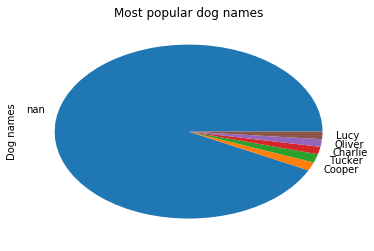

In [78]:
master_df['name'].value_counts().head(6).plot(kind='pie',title='Most popular dog names', label='Dog names');
plt.savefig('pie-names.png');

 As you can see in the piechart, the predominant value is 'nan'. The reason is that 529 out of the 1657 rows do not include any dog name in the text. Tucker and Cooper are the most repeated dog names (9 times each), followed by Lucy, Oliver and Charlie (8 times each)

__I was interested in finding out the name of the dog that got the highest rating. Nevertheless, there are 22 tweets with the highest rating: 14/10__

In [79]:
master_df[master_df['rating']==master_df['rating'].max()]['name']

8                 Cassie
33     itselizabethgales
46                puffie
58                  Emmy
91                Walter
130               Cermet
136                  nan
179                  nan
219                  nan
222                 Kuyu
240                  nan
243              Doobert
260                  nan
275                 Gabe
280             Sundance
286                  nan
292                   Bo
319                 Gary
354                Ollie
485                 Loki
504                  nan
697                  nan
Name: name, dtype: object

In [80]:
len(master_df[master_df['rating']==master_df['rating'].max()])

22

##### __Finally, I'd like to find out whether there is any correlation or not between two popularity measures: 'ratings' given by WeRateDogs to the dogs in the tweets and 'like_count', i.e. the amount of likes the tweet received.___

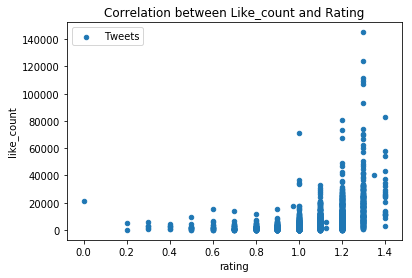

In [81]:
master_df.plot(x='rating',y='like_count', kind='scatter', title= 'Correlation between Like_count and Rating', label='Tweets');
plt.savefig('scatter-rating-likes.png')

In the scatter chart above, we have the rating received by the dogs on the X axe and the likes received by the tweets on the Y axe. There seems to be a positive correlation between both measures. Indeed, the tweets were the rating of the dogs was of 10/10 and over (being 14/10 the maximum rating) got overall more likes than the rest of the tweets.

### Conclusion

1. The three breeds for which the confidence interval of images being of dogs are highest in our dataset are Komondor (97.25%), Clumber(94.67%) and Brittany Spaniel (87.45%). These are still predictions so to be sure that they correspond to the reality we should visually check each image.

2. The five most popular dog names in our dataset are Cooper(9), Tucker(9), Charlie(8), Oliver(8) and Lucy(8). However, there are 526 entries without a valid name, which represents roughly 32% of the dataset. This is to be kept in mind when trying to reach any conclusion/insight involving the name of the dogs. 

3. There are 22 dogs rated with the highest rating: 1.4 or 14/10. Some of their names are: Puffy, Emmy, Walter, Cermet, Kuyu, Doobert, Gabe, Sundance. The dataset doesn't contain the name of the dog for quite a few of the best noted tweets.

4. There seems to be a quite positive correlation between the likes received  by a tweet and the rating given by "WeRateDogs" to the picture in the tweet (see scatter chart a few paragraphs above).